In [1]:
import numpy as np

from function_modules.function_module import *
from function_modules import parallel_function_module

In [2]:
# Shared directory to save results 
shared_data_dir = 'Data/parameter_testing/parallel_GA/'

# Shared GA parameters
kwargs = {
    'cnn_model_path': '../../Models/CNN_6_1_2.keras',
    'masked_sequence': 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG',
    'seed': 0,
}

# Testing parameters
target_expressions = [0, 0.5, 1]
lineages = 5
test_cases = 11

In [ ]:
param_ranges = {
    'population_size': [20],
    'generations': [20],
}

# Evaluate ParallelGeneticAlgorithm
ParallelGeneticAlgorithm_df = parallel_function_module.test_params(param_ranges, target_expressions, lineages, kwargs)
ParallelGeneticAlgorithm_df['algorithm'] = 'ParallelGeneticAlgorithm'

# Evaluate GeneticAlgorithm
GeneticAlgorithm_df = test_params(param_ranges, target_expressions, lineages, kwargs)
GeneticAlgorithm_df['algorithm'] = 'GeneticAlgorithm'

# Concatenate all results, and save to csv
results_df = pd.concat([ParallelGeneticAlgorithm_df, GeneticAlgorithm_df])
results_df.to_csv(f'{shared_data_dir}parallel_comparison.csv', index=False)

Processing combinations:   0%|          | 0/15 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Optimal algorithm for error: ParallelGeneticAlgorithm (Average error: 0.132)
ANOVA Test for error by algorithm:
  - F-statistic: 0.139
  - p-value: 7.137e-01
  - Not Significant

Optimal algorithm for run_time: ParallelGeneticAlgorithm (Average run_time: 3.274)
ANOVA Test for run_time by algorithm:
  - F-statistic: 4.640
  - p-value: 4.503e-02
  - Significant



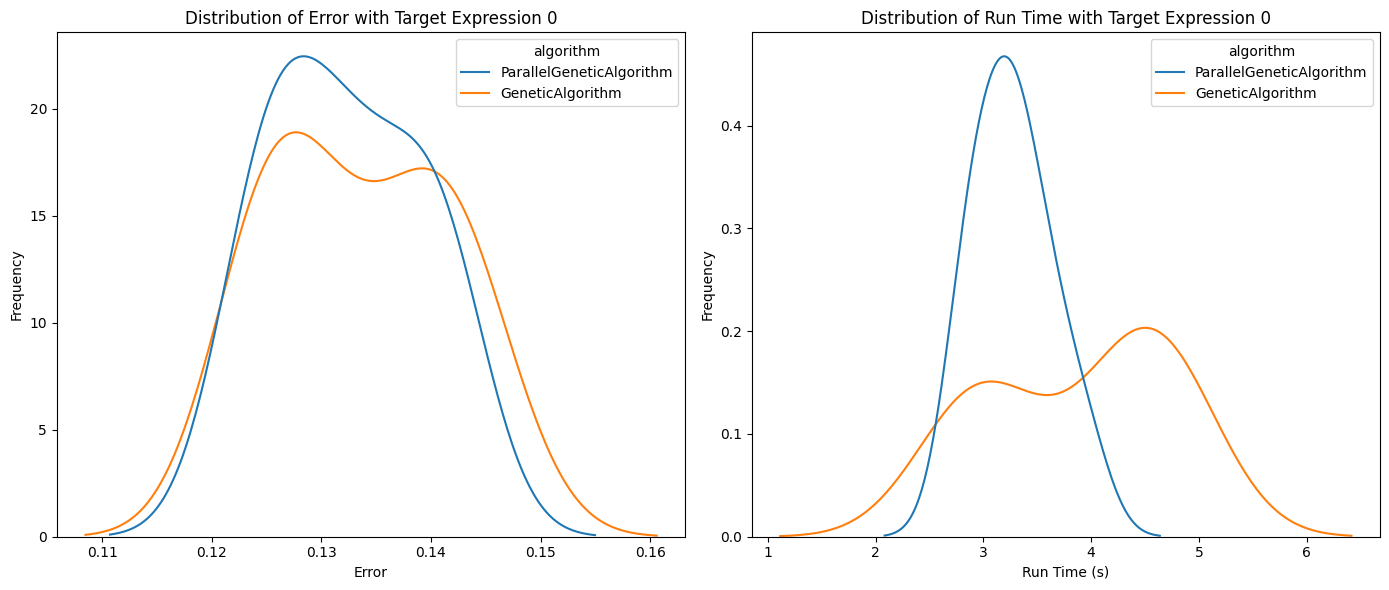

Optimal algorithm for error: ParallelGeneticAlgorithm (Average error: 0.000)
ANOVA Test for error by algorithm:
  - F-statistic: 0.223
  - p-value: 6.424e-01
  - Not Significant

Optimal algorithm for run_time: ParallelGeneticAlgorithm (Average run_time: 3.490)
ANOVA Test for run_time by algorithm:
  - F-statistic: 1.172
  - p-value: 2.932e-01
  - Not Significant



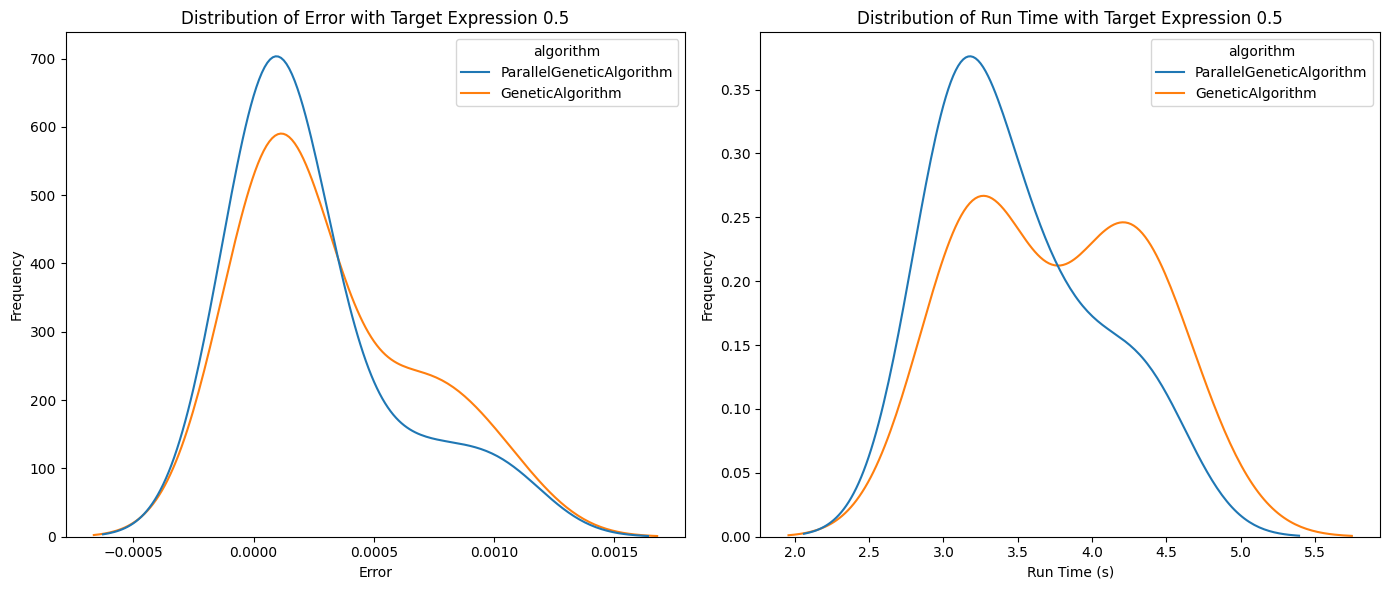

Optimal algorithm for error: GeneticAlgorithm (Average error: 0.157)
ANOVA Test for error by algorithm:
  - F-statistic: 0.121
  - p-value: 7.319e-01
  - Not Significant

Optimal algorithm for run_time: GeneticAlgorithm (Average run_time: 2.860)
ANOVA Test for run_time by algorithm:
  - F-statistic: 15.685
  - p-value: 9.173e-04
  - Significant



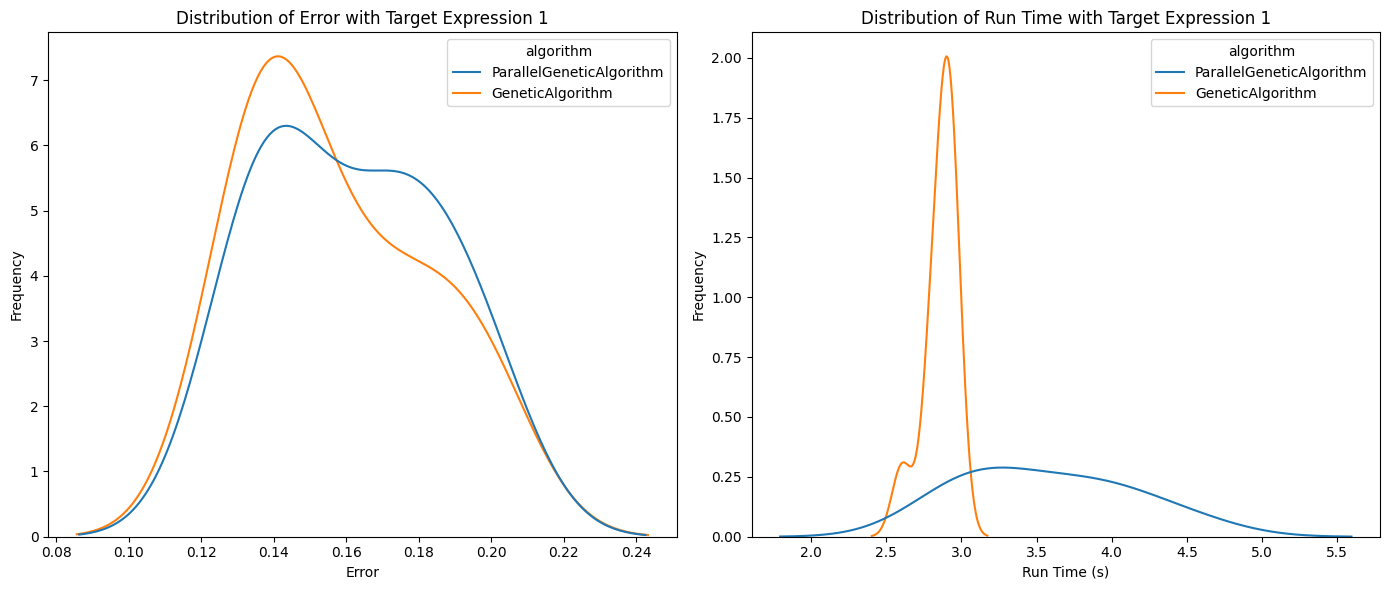

In [3]:
# Read results (if necessary) and plot
results_df = pd.read_csv(f'{shared_data_dir}parallel_comparison.csv')

for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    distribution_plot(filtered_df, target_expression, 'algorithm')